# Tên đề tài: Nhận diện người có đeo khẩu trang hay không?
__Tên thành viên:__
1. Ngô Quốc Hoàng - 19477071
2. Trần Tuấn Vũ - 19474281
3. Phan Nguyễn Mai Phương - 19469121
4. Nguyễn Tuấn Sinh - 19477821


## Lý do chọn đề tài:
Đại dịch COVID-19 đã khiến cuộc sống của mọi người trở nên đảo lộn và gây ra rất nhiều khó khăn trong sinh hoạt như đi lại, ăn uống,.. Nhiều quốc gia đã bắt buộc người dân của họ phải đeo khẩu trang để bảo về sức khỏe của chính mình cũng như toàn thể xã hội.

Để bảo vệ mình khỏi đại dịch COVID-19 hầu hết mọi người trong chúng ta đều có xu hướng đeo khẩu trang. Chính vì thế mà việc kiểm tra những người trong đám đông có đeo khẩu trang ở các tụ điểm công cộng như sân bay, trung tâm mua sắm, công viên, .. hay không rất là cần thiết.

Từ lý do đấy, chúng tôi đã quyết định xây dựng một mô hình Mạng CNN đơn giản bằng việc sử dụng TensorFlow với thư viện Keras và OpenCV để phát hiện người có đang đeo khẩu trang hay không. Tôi mong ứng dụng của phương pháp này có thể rất hữu ích cho việc ngăn ngừa và kiểm soát COVID-19.

## 1. Bài toán phân lớp (Image Classification)
Chúng ta phải phân loại các hình ảnh giữa 2 lớp rời rạc: Lớp có đeo khẩu trang và lớp không có đeo khẩu trang.
__Mục tiêu:__
Phân loại được dữ liệu đầu vào theo yêu cầu bài toán thông qua mô hình phân lớp cụ thể:

- Mô hình được huấn luyện bởi một tập dữ liệu đã được gắn nhãn (train set).
- Đầu ra của bài toán là mô hình đã được huấn luyện để có thể phân lớp cho một tập dữ liệu chưa được phân lớp (test set).
### 1.1. Xây dựng mô hình phân lớp:

- Chuẩn bị dữ liệu sơ và các công cụ để crawl dữ liệu, chọn lọc và đánh giá, v..v..
- Lựa chọn một số mô hình, có thể triển khai thủ công hoặc tham khảo model fit có sẵn.
- Training model bằng dataset - train set.
- Đưa ra các accuracy metric và đánh giá.
### 1.2. Cơ sở để phân lớp theo yêu cầu bài toán

- Áp dụng một số model CNN.

## 2. Dữ liệu

Để xây dựng mô hình này, chúng tôi sẽ sử dụng tập dữ liệu mặt người khi đeo khẩu trang. Có hơn  3402 hình ảnh với khoảng 1701 hình ảnh có người đeo khẩu trang và 1701 hình ảnh mặt người không đeo khẩu trang.

### 2.1. Đặc tính ảnh từ dữ liệu:

- Ảnh màu kỹ thuật số được crawl từ internet
- Bộ dữ liệu được chia làm 2 tập: train set và test set
- Kích thước ảnh: không đồng bộ ⇒ để train và test cần resize về cùng kích thước
- Số lượng:
    - Train set: 2700 ảnh
    - Test set: 600 ảnh

### 2.1. Đặc tính ảnh vào hệ thống:

- Định dạng: jpg, png
- Kích cỡ: 150x150
- Batch size: 32
- Epoch: 70
- Learning rate: 0.0001

## 3. Kiến thức chung

### 3.1. Image classification

Bài toán phân loại ảnh: Có đầu vào (input) là ảnh và một danh sách các nhãn (labels), mục tiêu của bài toán là xác định ảnh đầu vào thuộc nhãn nào – hay ouput là nhãn tương ứng với input.

### 3.2. Mạng CNN cho bài toán phân lớp

Convolutional Neural Networks (CNN) là một trong những mô hình deep learning phổ biến nhất và có ảnh hưởng nhiều nhất trong cộng đồng Computer Vision. CNN được dùng trong trong nhiều bài toán như nhân dạng ảnh, phân tích video, ảnh MRI, hoặc cho bài các bài của lĩnh vự xử lý ngôn ngữ tự nhiên và hầu hết đều giải quyết tốt các bài toán này.
#### Cấu trúc CNN:
CNN bao gồm tập hợp các lớp cơ bản bao gồm: convolution layer + nonlinear layer, pooling layer, fully connected layer. Các lớp này liên kết với nhau theo một thứ tự nhất định. Thông thường, một ảnh sẽ được lan truyền qua tầng convolution layer + nonlinear layer đầu tiên, sau đó các giá trị tính toán được sẽ lan truyền qua pooling layer, bộ ba convolution layer + nonlinear layer + pooling layer có thể được lặp lại nhiều lần trong network. Và sau đó được lan truyền qua tầng fully connected layer và softmax để tính sác xuất ảnh đó chứa vật thể gì.
![](https://thanhvie.com/wp-content/uploads/2020/08/cnn_model.jpeg)
##### Convolution Layer
Convolution layer là lớp quan trọng nhất và cũng là lớp đầu tiên của của mô hình CNN. Lớp này có chức năng chính là phát hiện các đặc trưng có tính không gian hiệu quả. Trong tầng này có 4 đối tượng chính là: ma trận đầu vào, bộ **filters**, và **receptive field**, **feature map**. Conv layer nhận đầu vào là một ma trận 3 chiều và một bộ filters cần phải học. Bộ filters này sẽ trượt qua từng vị trí trên bức ảnh để tính tích chập (convolution) giữa bộ filter và phần tương ứng trên bức ảnh. Phần tưng ứng này trên bức ảnh gọi là receptive field, tức là vùng mà một neuron có thể nhìn thấy để đưa ra quyết định, và mà trận cho ra bới quá trình này được gọi là feature map

- Tầng convolution có chức năng chính là phát hiện đặc trưng cụ thể của bức ảnh. Những đặc trưng này bao gồm đặc trưng cơ bản là góc,cạnh, màu sắc, hoặc đặc trưng phức tạp hơn như texture của ảnh. Vì bộ filter quét qua toàn bộ bức ảnh, nên những đặc trưng này có thể nằm ở vị trí bất kì trong bức ảnh, cho dù ảnh bị xoáy trái/phải thì những đặc trưng này vẫn bị phát hiện.
- Kích thước bộ filter là một trong những tham số quan trọng nhất của tầng convolution. Kích thước này tỉ lệ thuận với số tham số cần học tại mỗi tầng convolution và là tham số quyết định receptive field của tầng này. Kích thước phổ biến nhất của bộ filter là 3x3.Kích thước filter nhỏ được ưu tiên lựa chọn thay kích thước lớn.
##### Nonlinear Layer
ReLU (Rectified Linear Units, f = max(0, x)) là hàm kích hoạt phổ biến nhất cho CNN tại thời điểm của bài viết, được giới thiệu bởi Geoffrey E. Hinton năm 2010. Trước khi hàm ReLU được áp dụng thì những hàm như sigmoid hay tanh mới là những hàm được sử dụng phổ biến. Hàm ReLU được ưa chuộng vì tính toán đơn giản, giúp hạn chế tình trạng vanishing gradient, và cũng cho kết quả tốt hơn. ReLU cũng như những hàm kích hoạt khác, được đặt ngay sau tầng convolution, ReLU sẽ gán những giá trị âm bằng 0 và giữ nguyên giá trị của đầu vào khi lớn hơn 0.

ReLU cũng có một số vấn đề tiềm ẩn như không có đạo hàm tại điểm 0, giá trị của hàm ReLU có thể lớn đến vô cùng và nếu chúng ta không khởi tạo trọng số cẩn thận, hoặc khởi tạo learning rate quá lớn thì những neuron ở tầng này sẽ luôn có giá trị < 0.
##### Pooling Layer
ReLU (Rectified Linear Units, f = max(0, x)) là hàm kích hoạt phổ biến nhất cho CNN tại thời điểm của bài viết, được giới thiệu bởi Geoffrey E. Hinton năm 2010. Trước khi hàm ReLU được áp dụng thì những hàm như sigmoid hay tanh mới là những hàm được sử dụng phổ biến. Hàm ReLU được ưa chuộng vì tính toán đơn giản, giúp hạn chế tình trạng vanishing gradient, và cũng cho kết quả tốt hơn. ReLU cũng như những hàm kích hoạt khác, được đặt ngay sau tầng convolution, ReLU sẽ gán những giá trị âm bằng 0 và giữ nguyên giá trị của đầu vào khi lớn hơn 0.

ReLU cũng có một số vấn đề tiềm ẩn như không có đạo hàm tại điểm 0, giá trị của hàm ReLU có thể lớn đến vô cùng và nếu chúng ta không khởi tạo trọng số cẩn thận, hoặc khởi tạo learning rate quá lớn thì những neuron ở tầng này sẽ luôn có giá trị < 0.
##### Fully Connected Layer
Tầng cuối cùng của mô hình CNN trong bài toán phân loại ảnh là tầng fully connected layer. Tầng này có chức năng chuyển ma trận đặc trưng ở tầng trước thành vector chứa xác suất của các đối tượng cần được dự đoán.



## Thêm các thư viện cần dùng

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

In [14]:
# Khởi tạo các thông số learning rate, epoch và batch size, image size cho mô hình
INIT_LR = 1e-4
EPOCHS = 50
BS = 32
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [15]:
#Load hình ảnh
print("[INFO] loading images...")
imagePaths = list(paths.list_images("data"))
data = []
labels = []
len(imagePaths)

[INFO] loading images...


3988

In [16]:
# Cập nhật list data, list label
for imagePath in imagePaths:
	# trích xuất nhãn từ đường dẫn của ảnh
	label = imagePath.split(os.path.sep)[-2]

	# load ảnh và xử lý
	image = load_img(imagePath, target_size=(IMG_HEIGHT, IMG_WIDTH))
	image = img_to_array(image)
	image = preprocess_input(image)

	data.append(image)
	labels.append(label)

# Chuyển đổi data và label sang dạng numpy
data = np.array(data, dtype="float32")
labels = np.array(labels)


In [17]:
# len(labels)
labels


array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

In [18]:
# one-hot, encoding labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

# chia dữ liệu thành hai tập train, test tương ứng (80%, 20%)
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

In [19]:
# tăng cường dữ liệu
aug = ImageDataGenerator(
	rotation_range=40,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.2,
	horizontal_flip=True,
	fill_mode="nearest")

## Mô hình huấn luyện

In [20]:
#conv2d (thêm hình ảnh...)
model = tf.keras.models.Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(2,2),
    # Conv2D(64, 3, activation='relu'),
    # MaxPooling2D(2,2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.3), 
    Dense(256, activation='relu'),
    Dense(2, activation='softmax') # dense layer has a shape of 2 as we have only 2 classes 
])

In [21]:
# compile
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


C:\Users\Hoang\AppData\Roaming\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [22]:
# train model
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] training head...
Epoch 1/50
99/99 [==============================] - 56s 560ms/step - loss: 0.2783 - accuracy: 0.8901 - val_loss: 0.1142 - val_accuracy: 0.9674
Epoch 2/50
99/99 [==============================] - 48s 479ms/step - loss: 0.1316 - accuracy: 0.9544 - val_loss: 0.1052 - val_accuracy: 0.9749
Epoch 3/50
99/99 [==============================] - 47s 478ms/step - loss: 0.1191 - accuracy: 0.9611 - val_loss: 0.1062 - val_accuracy: 0.9737
Epoch 4/50
99/99 [==============================] - 48s 486ms/step - loss: 0.1252 - accuracy: 0.9592 - val_loss: 0.0963 - val_accuracy: 0.9749
Epoch 5/50
99/99 [==============================] - 48s 485ms/step - loss: 0.1204 - accuracy: 0.9623 - val_loss: 0.0913 - val_accuracy: 0.9799
Epoch 6/50
99/99 [==============================] - 48s 482ms/step - loss: 0.1109 - accuracy: 0.9630 - val_loss: 0.0932 - val_accuracy: 0.9774
Epoch 7/50
99/99 [==============================] - 48s 483ms/step - loss: 0.1053 - accuracy: 0.9623 - val_loss: 0.088

__Kết quả:__
loss: 0.1102 - accuracy: 0.9572 - val_loss: 0.0549 - val_accuracy: 0.9794

In [23]:
# đưa ra dự đoán trên tập test
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# đối với mỗi hình ảnh trong tập test, ta tìm cái index của nhãn sao cho xác suất dự đoán là lớn nhất
predIdxs = np.argmax(predIdxs, axis=1)

# đánh giá mô hình
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

# lưu mô hình
print("[INFO] saving mask detector model...")
model.save("mask_detector_113.model", save_format="h5")


[INFO] evaluating network...
              precision    recall  f1-score   support

   with_mask       0.99      0.99      0.99       411
without_mask       0.99      0.99      0.99       387

    accuracy                           0.99       798
   macro avg       0.99      0.99      0.99       798
weighted avg       0.99      0.99      0.99       798

[INFO] saving mask detector model...


__Các chỉ số đánh giá:__
$$Precision = \frac{TP}{TP + FP}$$

$$Recall = \frac{TP}{TP + FN}$$

Tiêu chí đánh giá **F1** hay **F1-score** là sự kết hợp của 2 tiêu chí đánh giá Precision và Recall

$$F_1 = \frac{2.Precision.Recall}{Precision + Recall}=\frac{2}{\frac{1}{Precision}+\frac{1}{Recall}}$$

**F1** là một **trung bình điều hòa (harmonic mean)** của các tiêu chí Precision và Recall

•F1 có xu hướng lấy giá trị gần với giá trị nào nhỏ hơn giữa 2 giá trị Precision và Recall

•F1 có giá trị lớn nếu cả 2 giá trị Precision và Recall đều lớn


## Kết quả đạt được:

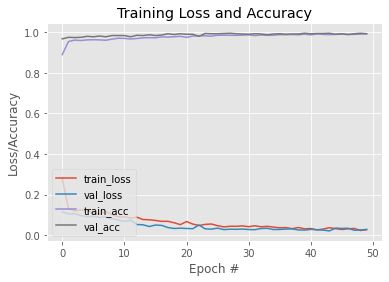

In [24]:
# vẽ biểu đồ training loss và accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("chart.png")